<a href="https://colab.research.google.com/github/weiyuchen1213/CE888/blob/master/pulsar_star_of_Decision_Making_As_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [2]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [5]:
from google.colab import files

#!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "weiyuchen77" # username from the json file
os.environ['KAGGLE_KEY'] = "3d26b3cb2ae2ad68701ebe9a6baadcc4" # key from the json file
!kaggle datasets download -d pavanraj159/predicting-a-pulsar-star # api copied from kaggle

  0% 0.00/771k [00:00<?, ?B/s]
100% 771k/771k [00:00<00:00, 52.6MB/s]


In [4]:
# read the datasets
p_pulsar = pd.read_csv("predicting-a-pulsar-star.zip")

FileNotFoundError: ignored

In [6]:
p_pulsar.head(5)

NameError: ignored

# Data Visualization

In [3]:
plt.pie(p_pulsar["target_class"].value_counts().values,
        labels=["not pulsar stars","pulsar stars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .1)
plt.title("Proportion of target variable in Pulsar dataset")
plt.show()



NameError: ignored

In [0]:
p_pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Check missing value

In [0]:
# dealing with missing value

#p_pulsar
total = p_pulsar.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['Total'])
missing_data.head()

,Total
target_class,0
Skewness of the DM-SNR curve,0
Excess kurtosis of the DM-SNR curve,0
Standard deviation of the DM-SNR curve,0
Mean of the DM-SNR curve,0


# Normalization

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
for col in p_pulsar.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    p_pulsar[col] = mms.fit_transform(p_pulsar[[col]])
p_pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.563516,0.294263,0.236676,0.050966,0.055566,0.183555,0.303691,0.089553,0.091574
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285,0.288432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509180,0.237869,0.191353,0.022939,0.007661,0.068430,0.236757,0.030962,0.000000
50%,0.584919,0.299640,0.211075,0.028480,0.011599,0.107395,0.307141,0.071285,0.000000
75%,0.649199,0.354712,0.236220,0.038912,0.023528,0.203905,0.367371,0.118432,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Lable encoding 

In [0]:
pulsar_X = p_pulsar.drop('target_class', axis = 1)
pulsar_Y = np.array(p_pulsar['target_class'])

from sklearn.preprocessing import LabelEncoder
for col in pulsar_X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    pulsar_X[col] = le.fit_transform(pulsar_X[col].astype('str'))
pulsar_X=pulsar_X.values


print("Pulsar:",pulsar_X)
print(pulsar_X.shape)
print(pulsar_Y.shape)


Pulsar: [[0.72134164 0.41768745 0.16504291 ... 0.11368057 0.29498574 0.06388987]
 [0.51762787 0.46090841 0.23541516 ... 0.0725243  0.36401483 0.10844339]
 [0.52034628 0.19686832 0.22113842 ... 0.13918843 0.28862387 0.05461031]
 ...
 [0.60771193 0.4751437  0.2046521  ... 0.49869934 0.14965285 0.00550903]
 [0.58186609 0.39361695 0.20885482 ... 0.05820853 0.34892638 0.11418141]
 [0.27435072 0.82458965 0.33003783 ... 0.5552546  0.04091771 0.00285542]]
(17898, 8)
(17898,)


In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [0]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(pulsar_X, pulsar_Y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


# DecisionTree

In [0]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold

cv_score_DT =[]
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
i=1
for train_index,test_index in skf.split(pulsar_X,pulsar_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = pulsar_X[train_index],pulsar_X[test_index]
    ytr,yvl = pulsar_Y[train_index],pulsar_Y[test_index]
    model_DT = tree.DecisionTreeClassifier(max_depth=10, criterion = "entropy")
    model_DT.fit(xtr,ytr)
    score_DT = roc_auc_score(yvl,model_DT.predict(xvl))
    print('ROC AUC score:',score_DT)
    cv_score_DT.append(score_DT)
    print('Confusion matrix \n',confusion_matrix(yvl,model_DT.predict(xvl)))
    i+=1

1 of KFold 10
ROC AUC score: 0.8777150271502715
Confusion matrix 
 [[1615   11]
 [  39  125]]
2 of KFold 10
ROC AUC score: 0.8920364203642037
Confusion matrix 
 [[1612   14]
 [  34  130]]
3 of KFold 10
ROC AUC score: 0.9240354903549036
Confusion matrix 
 [[1607   19]
 [  23  141]]
4 of KFold 10
ROC AUC score: 0.9219092190921909
Confusion matrix 
 [[1610   16]
 [  24  140]]
5 of KFold 10
ROC AUC score: 0.9307218072180722
Confusion matrix 
 [[1599   27]
 [  20  144]]
6 of KFold 10
ROC AUC score: 0.9234204842048421
Confusion matrix 
 [[1605   21]
 [  23  141]]
7 of KFold 10
ROC AUC score: 0.9060240602406023
Confusion matrix 
 [[1598   28]
 [  28  136]]
8 of KFold 10
ROC AUC score: 0.9313368133681336
Confusion matrix 
 [[1601   25]
 [  20  144]]
9 of KFold 10
ROC AUC score: 0.9119579079226375
Confusion matrix 
 [[1619    7]
 [  28  135]]
10 of KFold 10
ROC AUC score: 0.873125703564728
Confusion matrix 
 [[1609   16]
 [  40  124]]


# RandomForest

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
cv_score_RF =[]

i=1
for train_index,test_index in skf.split(pulsar_X,pulsar_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = pulsar_X[train_index],pulsar_X[test_index]
    ytr,yvl = pulsar_Y[train_index],pulsar_Y[test_index]
    model_RF = RandomForestClassifier(n_estimators=100)
    model_RF.fit(xtr,ytr)
    score_RF = roc_auc_score(yvl,model_RF.predict(xvl))
    print('ROC AUC score:',score_RF)
    cv_score_RF.append(score_RF)
    print('Confusion matrix \n',confusion_matrix(yvl,model_RF.predict(xvl)))
    i+=1

1 of KFold 10
ROC AUC score: 0.8975452254522546
Confusion matrix 
 [[1620    6]
 [  33  131]]
2 of KFold 10
ROC AUC score: 0.8883988839888399
Confusion matrix 
 [[1620    6]
 [  36  128]]
3 of KFold 10
ROC AUC score: 0.9231392313923139
Confusion matrix 
 [[1614   12]
 [  24  140]]
4 of KFold 10
ROC AUC score: 0.9347455974559746
Confusion matrix 
 [[1622    4]
 [  21  143]]
5 of KFold 10
ROC AUC score: 0.9405094050940509
Confusion matrix 
 [[1611   15]
 [  18  146]]
6 of KFold 10
ROC AUC score: 0.9268030180301803
Confusion matrix 
 [[1616   10]
 [  23  141]]
7 of KFold 10
ROC AUC score: 0.9063578135781358
Confusion matrix 
 [[1609   17]
 [  29  135]]
8 of KFold 10
ROC AUC score: 0.9368456184561846
Confusion matrix 
 [[1609   17]
 [  19  145]]
9 of KFold 10
ROC AUC score: 0.9251503557980365
Confusion matrix 
 [[1622    4]
 [  24  139]]
10 of KFold 10
ROC AUC score: 0.8828874296435273
Confusion matrix 
 [[1611   14]
 [  37  127]]


# Elbow Method

1 of KFold 10


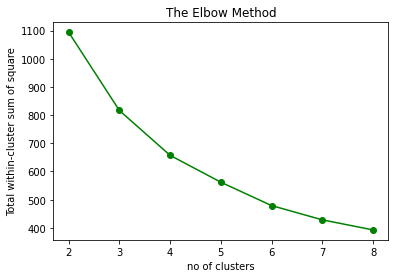

2 of KFold 10


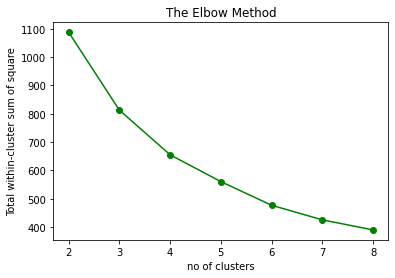

3 of KFold 10


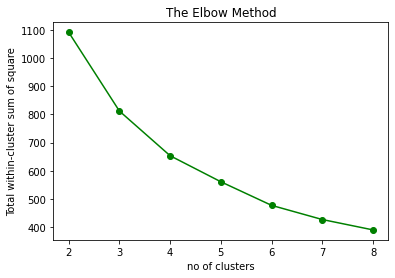

4 of KFold 10


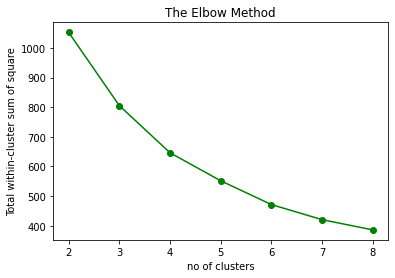

5 of KFold 10


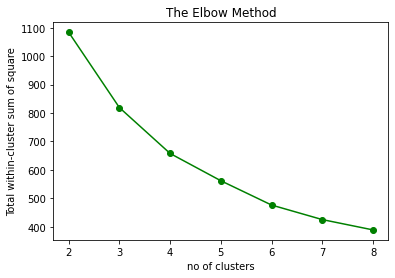

6 of KFold 10


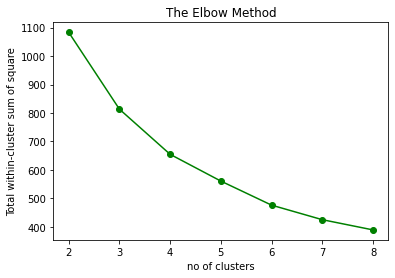

7 of KFold 10


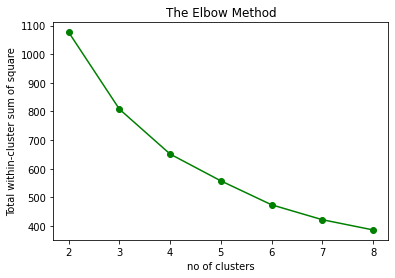

8 of KFold 10


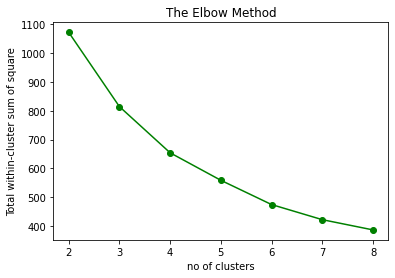

9 of KFold 10


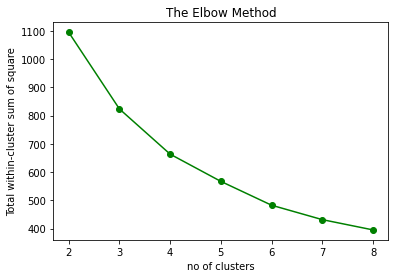

10 of KFold 10


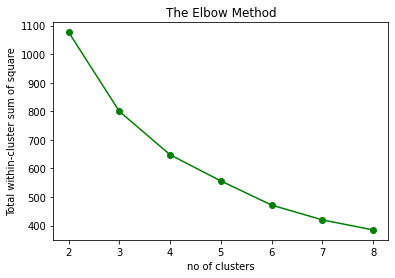

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)

i=1
for train_index,test_index in skf.split(pulsar_X,pulsar_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = pulsar_X[train_index],pulsar_X[test_index]
    ytr,yvl = pulsar_Y[train_index],pulsar_Y[test_index]

    score = []
    for cluster in range(2,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(xtr)
        score.append(kmeans.inertia_)

    plt.plot(range(2,9), score, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1

# Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.625303475089285
For n_clusters = 3 The average silhouette_score is : 0.6029695359969913
For n_clusters = 4 The average silhouette_score is : 0.2663529605256185
For n_clusters = 5 The average silhouette_score is : 0.3157749712371591
For n_clusters = 6 The average silhouette_score is : 0.301694489630827
For n_clusters = 7 The average silhouette_score is : 0.2966746013367946
For n_clusters = 8 The average silhouette_score is : 0.26668910312113786


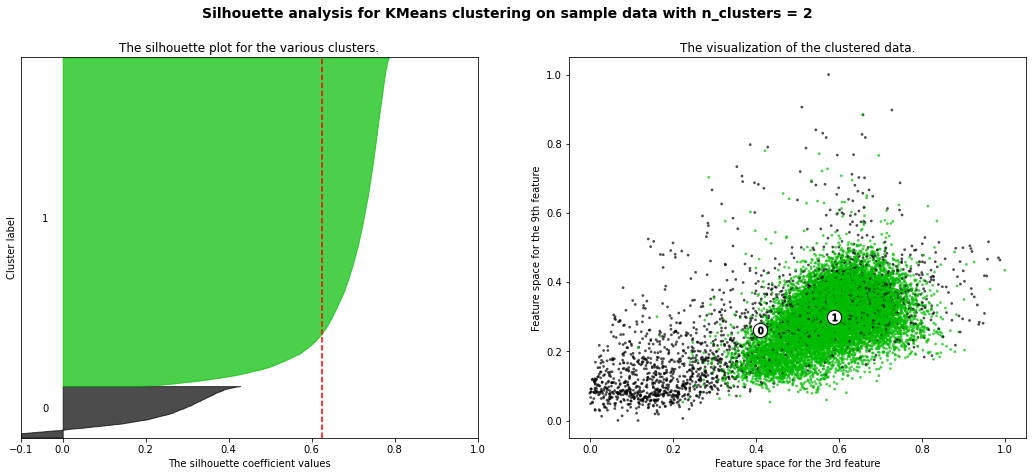

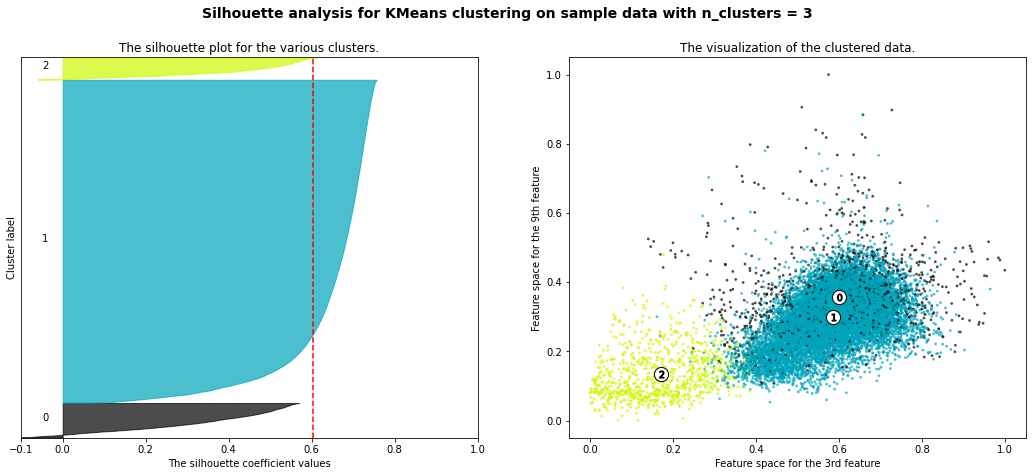

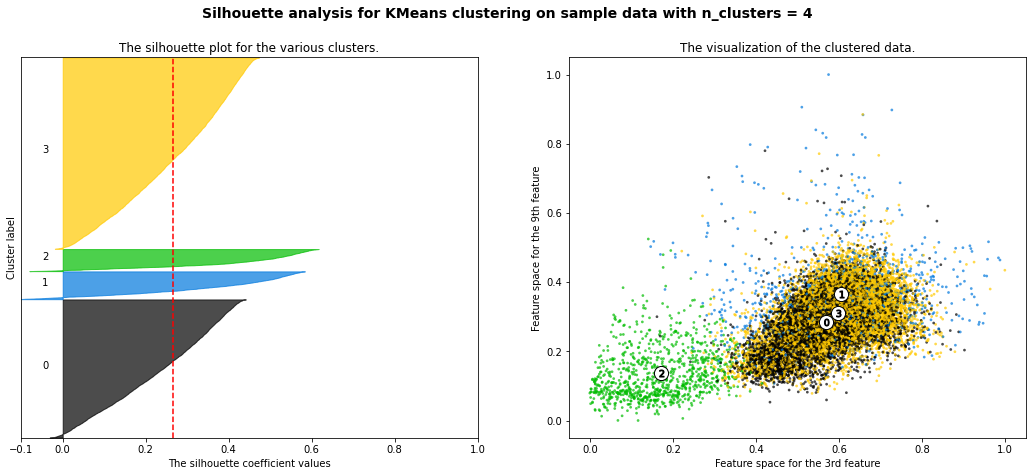

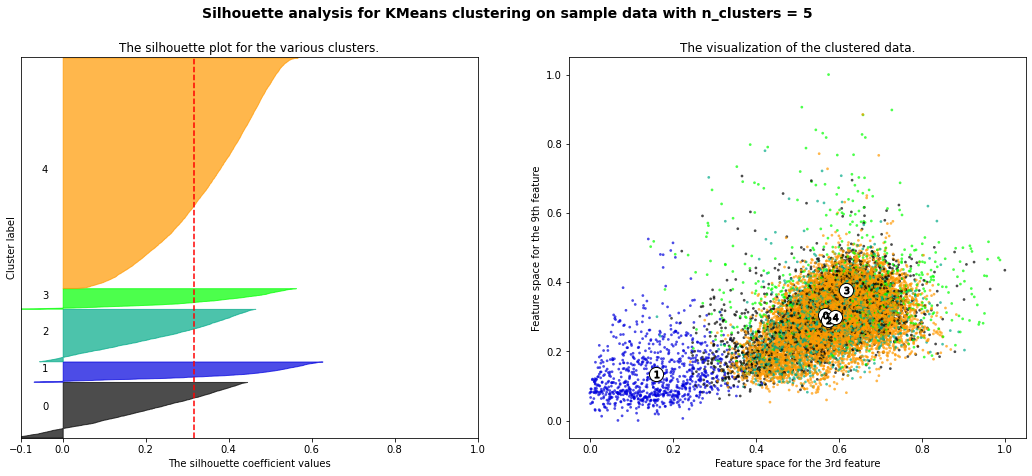

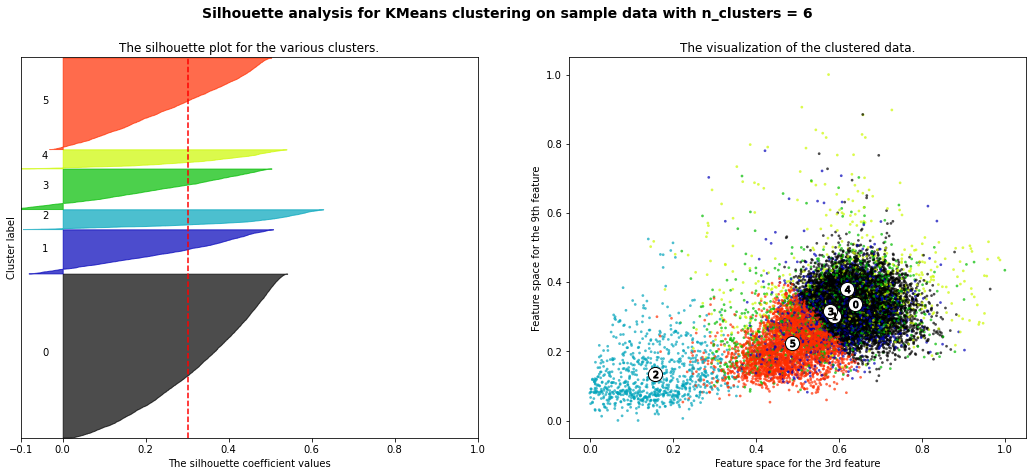

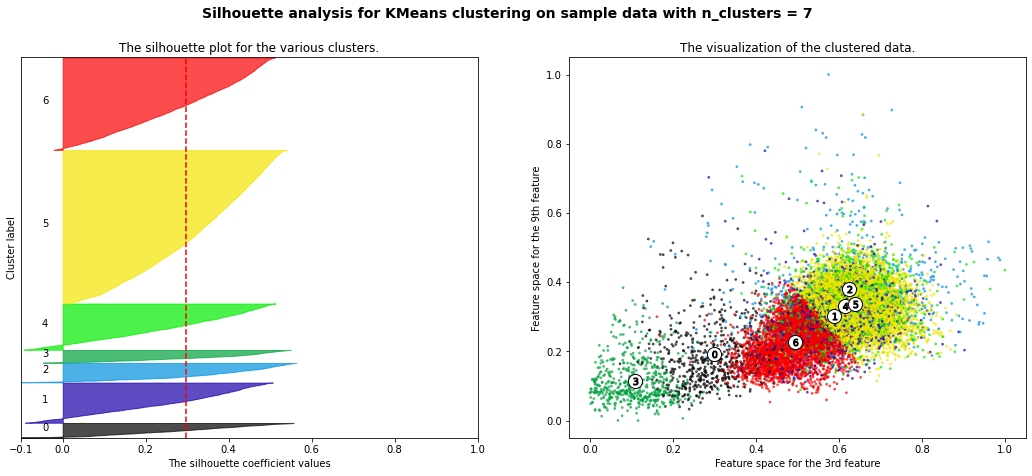

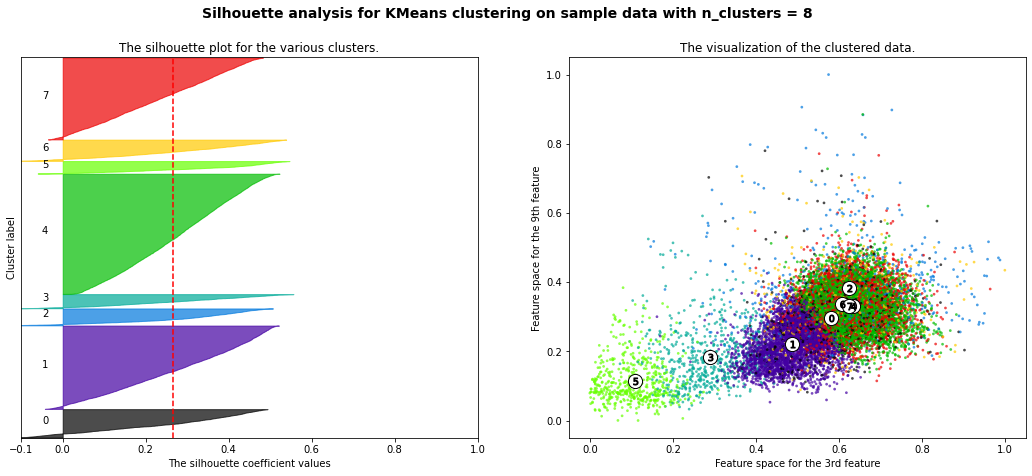

In [0]:
#ref:https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
#ref:https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(xtr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(xtr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(xtr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(xtr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(xtr[:, 0], xtr[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

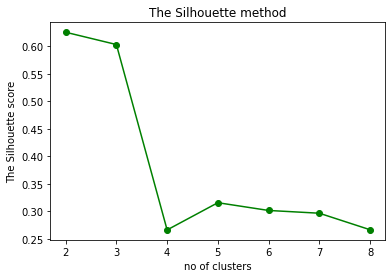

In [0]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()

# K-mean method and save the information

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(xtr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

Label: [2183, 13926]
Centroids [[0.40969487 0.26152723 0.39114203 0.17130381 0.31697823 0.59538116
  0.11204523 0.00332875]
 [0.58755262 0.29970323 0.21246278 0.03218021 0.01460475 0.12080279
  0.33070198 0.10038647]]


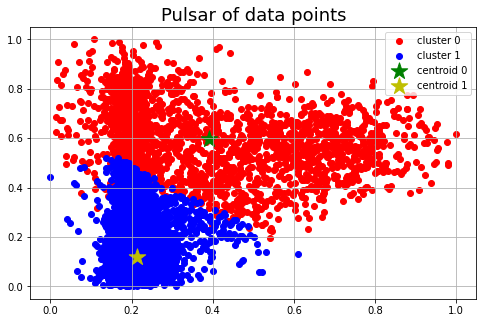

In [0]:
plt.figure(figsize=(8,5))
plt.title("Pulsar of data points", fontsize=18)
plt.grid(True)
plt.scatter(xtr[kmeans.labels_ == 0, 2], xtr[kmeans.labels_ == 0, 5],
            c='red', label='cluster 0')
plt.scatter(xtr[kmeans.labels_ == 1, 2], xtr[kmeans.labels_ == 1, 5],
            c='blue', label='cluster 1')
plt.scatter(centroids[0, 2], centroids[0, 5], marker='*', s=300, c='g', label='centroid 0')
plt.scatter(centroids[1, 2], centroids[1, 5], marker='*', s=300, c='y', label='centroid 1')
plt.legend()
plt.savefig('Pulsar Kmean_10th fold.png', dpi=300)
plt.show()

0 of KFold 10
ROC AUC score: 0.8303408034080341
Confusion matrix
 [[1570   56]
 [  50  114]]
1 of KFold 10
ROC AUC score: 0.839460894608946
Confusion matrix
 [[1560   66]
 [  46  118]]
2 of KFold 10
ROC AUC score: 0.18680061800618006
Confusion matrix
 [[  82 1544]
 [ 111   53]]
3 of KFold 10
ROC AUC score: 0.8286907869078692
Confusion matrix
 [[1406  220]
 [  34  130]]
4 of KFold 10
ROC AUC score: 0.8515247652476525
Confusion matrix
 [[1510  116]
 [  37  127]]
5 of KFold 10
ROC AUC score: 0.8746849968499686
Confusion matrix
 [[1506  120]
 [  29  135]]
6 of KFold 10
ROC AUC score: 0.11491239912399125
Confusion matrix
 [[ 106 1520]
 [ 137   27]]
7 of KFold 10
ROC AUC score: 0.16364788647886477
Confusion matrix
 [[ 205 1421]
 [ 131   33]]
8 of KFold 10
ROC AUC score: 0.12089964457926787
Confusion matrix
 [[  54 1572]
 [ 129   34]]
9 of KFold 10


IndexError: ignored

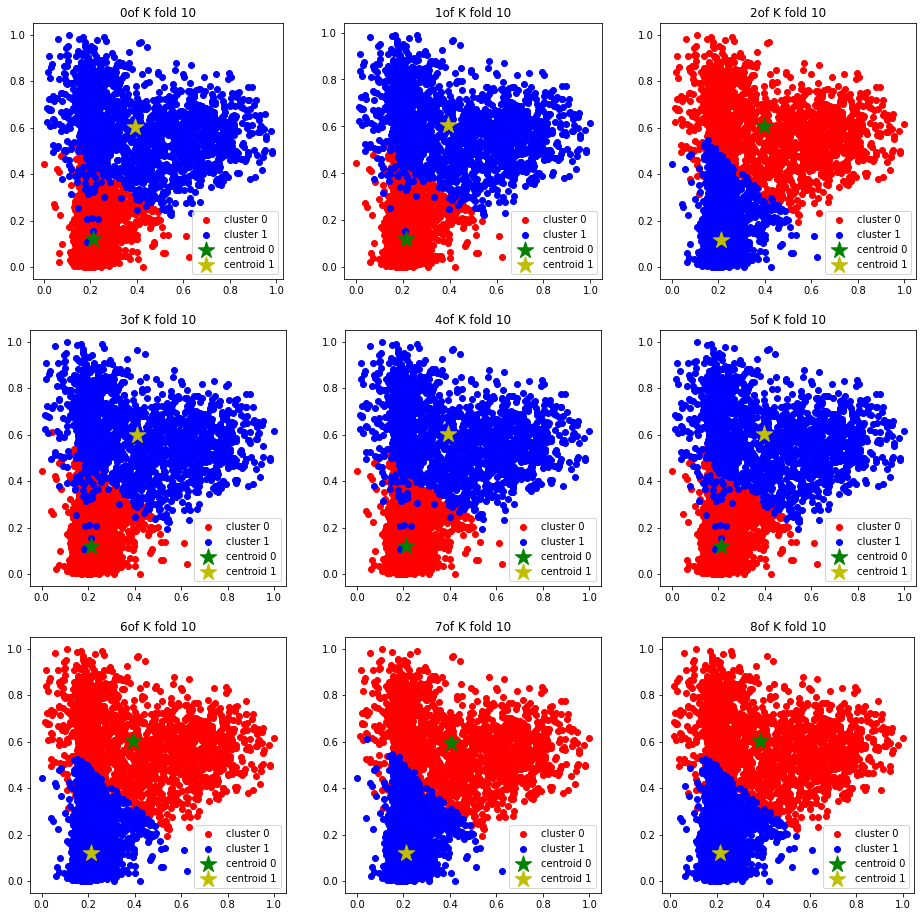

In [0]:
#ref:https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

pred_test_full =0
Label_all = []
centroids_all = []
cv_scoreRF_new =[]
ConfusionMatrix_all = []

i=0

fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in skf.split(pulsar_X,pulsar_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = pulsar_X[train_index],pulsar_X[test_index]
    ytr,yvl = pulsar_Y[train_index],pulsar_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49)
    kmeans.fit(xtr)
    kmeans.predict(xvl)
    kmLabels = kmeans.labels_
    centers.append(kmLabels)
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    #plt.figure(figsize=(8,5))
    #plt.title("Titanic of data points" "(%d of KFold 10)" %i, fontsize=18)
    #plt.grid(True)
    ax[i].scatter(xtr[kmeans.labels_ == 0, 2], xtr[kmeans.labels_ == 0, 5],
                c='red', label='cluster 0')
    ax[i].scatter(xtr[kmeans.labels_ == 1, 2], xtr[kmeans.labels_ == 1, 5],
                c='blue', label='cluster 1')
    ax[i].scatter(centroids[0, 2], centroids[0, 5], marker='*', s=300, c='g', label='centroid 0')
    ax[i].scatter(centroids[1, 2], centroids[1, 5], marker='*', s=300, c='y', label='centroid 1')
    ax[i].legend()
    ax[i].legend(loc='lower right')
    ax[i].set_title( str(i) +'of K fold 10')
    ax[i].set_aspect('equal')
    #plt.savefig('Pulsar Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    #plt.show()

    ## train and test the dataset in random forest model
    modelRFnew = RandomForestClassifier(random_state=42)
    modelRFnew.fit(xtr,kmLabels)
    scoreRF_new = roc_auc_score(yvl,modelRFnew.predict(xvl))
    print('ROC AUC score:',scoreRF_new)
    cv_scoreRF_new.append(scoreRF_new)
    from sklearn.metrics import confusion_matrix
    ConfusionMatrix = confusion_matrix(yvl, modelRFnew.predict(xvl))
    print('Confusion matrix\n',ConfusionMatrix)
    ConfusionMatrix_all += [ConfusionMatrix]
    i+=1
plt.tight_layout();   

In [0]:
#ref:https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a
from sklearn.model_selection import cross_val_score
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
scores = cross_val_score(model_DT, pulsar_X, pulsar_Y, cv=Skf)
scores
print("Mean : %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Mean : 97.519%, Standard Deviation: (0.347%)
